# Распознавание цифр (MNIST)

In [6]:
import matplotlib.pyplot as plt

import torch
import torchvision
from torch import nn, optim
from torch.nn import Sequential, Linear, LogSoftmax, Sigmoid, Flatten, Softmax, ReLU
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

## Картинки!

In [3]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

train, val = random_split(train_data, [55000, 5000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)

100%|██████████| 9912422/9912422 [00:00<00:00, 26874951.52it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24457034.89it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 8758561.32it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8585186.47it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [20]:
val[4][0][0][10]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4118,
        0.9961, 0.2745, 0.0000, 0.0000, 0.0000, 0.0000, 0.0745, 0.8941, 0.9961,
        0.1176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

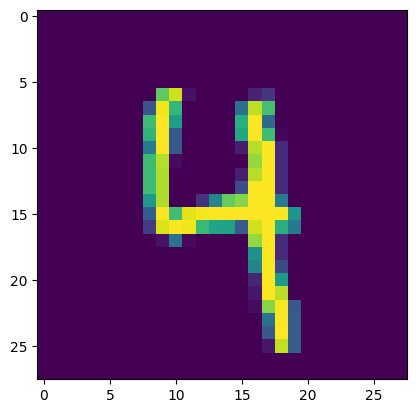

In [15]:
plt.imshow(val[4][0].reshape(28,28).numpy())
plt.show()

In [8]:
model = Sequential(
    Linear(28 * 28, 64), # на входе - размеры картинки
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 10) # 10 классов
)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# 4 эпохи
for epoch in range(4):
    
    # training part
    train_losses = list()
    train_count_correct = 0 
    for batch in train_loader: # 55000 / 32 раз
        x, y = batch
        # x: batch_size x 1 x 28 x 28
        # y: batch_size x 1
        
        x = x.view(x.size(0), -1) # matrix of vectors batch_size x (28 * 28)
        
        y_pred = model(x)
        
        batch_loss = criterion(y_pred, y)
        
        train_losses.append(batch_loss.item())
        train_count_correct += (y_pred.argmax(-1) == y).sum().item()
        
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch + 1}, Train Loss: {torch.tensor(train_losses).mean()}, Accuracy: {train_count_correct / len(train)}')


Epoch: 1, Train Loss: 1.1700985431671143, Accuracy: 0.6714
Epoch: 2, Train Loss: 0.3860948979854584, Accuracy: 0.8906
Epoch: 3, Train Loss: 0.3194361627101898, Accuracy: 0.9080727272727273
Epoch: 4, Train Loss: 0.283171147108078, Accuracy: 0.9186727272727273


## Check model

In [9]:
val_losses = list()
val_count_correct = 0
for batch in val_loader:
    x, y = batch
    x = x.view(x.size(0), -1)

    with torch.no_grad():
        y_pred = model(x) 

    batch_loss = criterion(y_pred, y)
    val_losses.append(batch_loss.item())
    val_count_correct += (y_pred.argmax(-1) == y).sum().item()

print(f'Test Loss: {torch.tensor(val_losses).mean()}, Test Accuracy: {val_count_correct / len(val)}')

Test Loss: 0.26986464858055115, Test Accuracy: 0.9214


## Обычно делают одновременно

In [10]:
model = Sequential(
    Linear(28 * 28, 64), # на входе - размеры картинки
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 10) # 10 классов
)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for epoch in range(4):
    
    # training part
    train_losses = list()
    train_count_correct = 0 
    for batch in train_loader:
        x, y = batch
        # x: batch_size x 1 x 28 x 28
        # y: batch_size x 1
        
        x = x.view(x.size(0), -1)
        
        y_pred = model(x) 
        
        batch_loss = criterion(y_pred, y)
        train_losses.append(batch_loss.item())
        train_count_correct += (y_pred.argmax(-1) == y).sum().item()
        
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch + 1}, Train Loss: {torch.tensor(train_losses).mean()}, Accuracy: {train_count_correct / len(train)}')
    
    # validation part
    val_losses = list()
    val_count_correct = 0
    for batch in val_loader:
        x, y = batch
        x = x.view(x.size(0), -1)
        
        with torch.no_grad():
            y_pred = model(x) 
        
        batch_loss = criterion(y_pred, y)
        val_losses.append(batch_loss.item())
        val_count_correct += (y_pred.argmax(-1) == y).sum().item()

    
    print(f'Epoch: {epoch + 1}, Test Loss: {torch.tensor(val_losses).mean()}, Accuracy: {val_count_correct / len(val)}')
    print('------------------------------------')


Epoch: 1, Train Loss: 1.2121529579162598, Accuracy: 0.6961454545454545
Epoch: 1, Test Loss: 0.45090577006340027, Accuracy: 0.8774
------------------------------------
Epoch: 2, Train Loss: 0.3829621970653534, Accuracy: 0.8930545454545454
Epoch: 2, Test Loss: 0.3362058103084564, Accuracy: 0.904
------------------------------------
Epoch: 3, Train Loss: 0.31776848435401917, Accuracy: 0.9088909090909091
Epoch: 3, Test Loss: 0.2978077530860901, Accuracy: 0.9136
------------------------------------
Epoch: 4, Train Loss: 0.2844504117965698, Accuracy: 0.9184727272727272
Epoch: 4, Test Loss: 0.27132800221443176, Accuracy: 0.9204
------------------------------------


# Ссылки интересные
* [MNIST solution](https://www.youtube.com/watch?v=OMDn66kM9Qc)